# Trabajo práctico integrador

## Introducción

Una variable aleatoria es una función que transforma un conjunto de números aleatorios en una sucesión que se corresponde con una distribución de probabilidad. Por lo tanto, la eficacia de este generador está condicionada por la calidad del generador de números aleatorios. No solo se trata de que los números aleatorios sean probabilísticamente de distribución uniforme e independientes, sino que el generador tenga un ciclo suficientemente amplio para obtener resultados verosímiles, sin que esto signifique que genere un impacto importante en el rendimiento del sistema. Por lo cual, en el siguiente informe nos proponemos analizar dicha influencia de los números aleatorios en la generación de variables aleatorias a partir de estos, desarrollando cada método desde cero y comparando los resultados de múltiples situaciones distintas.

### Objetivos del proyecto

- Desarrollar generadores de variables aleatorias eficaces que cubran un amplio espectro de distribuciones de probabilidad
- Probar la dependencia de estos de la calidad del generador de números aleatorios
- Desarrollar algoritmos que siempre generen variables aleatorias de calidad y de bajo impacto en el sistema

### Alcances del proyecto
El proyecto será desarrollado en su totalidad en Python. Se pueden distinguir las etapas expuestas a continuación.

1. **Desarrollo de generadores de números aleatorios:** Estos se desarrollarán de forma totalmente manual para tener total control de la calidad de los mismos. Se crearán generadores tanto congruenciales lineales como de cuadrados medios. De los primeros se brindará la opción de obtener generadores multiplicativos y mixtos y métodos para probar si son de ciclo completo.

2. **Validación de generadores de números aleatorios:** Se desarrollarán pruebas para validar la uniformidad e independencia estadísticas de las sucesiones de números obtenidas con los generadores antes dichos.

3. **Desarrollo de generadores de variables aleatorias:** Estos transformarán la sucesión de un generador especificado en una sucesión de variables aleatorias según una distribución a elección.

4. **Validación de generadores de variables aleatorias:** Se probarán los generadores de variables aleatorias con distintas sucesiones de números aleatorios para analizar el impacto de la calidad del primero en el segundo. Para esto, se realizará una simulación y se analizará el impacto en el resultado de la misma obtenido al definir distintos generadores de números aleatorios.

# Implementación en Python

A continuación se explicarán los generadores de números pseudoaleatorios, los generadores de variables aleatorias y las pruebas de aletoriedad implementados en Python.

## Generador de números pseudoaleatorios

Para facilitar la creación de generadores de números pseudoaleatorios a lo largo del trabajo práctico, se decidió abstraer el concepto de *generador de números aleatorios* con la clase `Generator`. Todos los generadores son subclases de `Generator` y deben implementar el método `next()`, el cual retorna el siguiente número aleatorio. También debe implementar  el método `get_xn_sequence()` y el método `get_random_numbers()`, los cuales devuelven la secuencia entera de números pseudoaleatorios $\{\mu_0, \mu_1, \dots, \mu_n\}$ y la secuencia de reales generados $\{x_0, x_1, \dots, x_n\}$ respectivamente. Por último deben implementar el método `verify_parameters()`, que verifica la validez de los parámetros del generador.

Además, todas las subclases de `Generador` cuentan con el método `plot_random_numbers()`, que grafica la secuencia de números pseudoaleatorios en el plano $xy$, donde el eje $x$ representa el índice $i$ del número pseudoaleatorio, y el eje $y$ representa el valor del número psuedoaleatorio $\mu_i$. Éste método admite el parámetro `join_points`, que en el caso de ser verdadero, une los puntos entre los números pseudoaleatorios, facilitando la visualizacion del orden de la secuencia $\mu_1, \mu_2, \dots, \mu_n$ generada.

Los generadores concretos implementados son:

* `MixedCongruentialGenerator` (generador congruencial lineal mixto)
* `MultiplicativeCongruentialGenerator` (generador congruencial lineal multiplicativo)
* `MiddleSquareGenerator` (generador de cuadrados medios)
* `DependentGenerator` (generador dependiente)

Estos serán explicados con mayor detalle a continuación.   

### Generadores congruenciales lineales
`LinearCongruentialGenerator` es una clase abstracta que representa el concepto de *generador congruencial lineal*. Se concreta en dos generadores, a saber, el `MultiplicativeCongruentialGenerator` y el `MixedCongruentialGenerator`.

Los generadores congruenciales lineales se definen denotando la relación recursiva de la siguiente manera: 

$$
x_{n+1} = \left( a x_n + b \right)\bmod m
$$
$$
\mu_n = \frac{x_n}{m}
$$

donde $x_n$ es la n-ésimo término del generador, $x_0$ es el primer término llamado semilla, $\mu_n$ es el n-ésimo número aleatorio generado, $m$ es el módulo, $a$ el elemento multiplicativo y $b$ es el elemento aditivo. El número aleatorio se calcula como:

La clase abstracta cuenta con un único método a implementar obligatoriamente: `has_max_sequence()`, que devuelve un booleano que indica si el generador es de ciclo completo. Por su parte, implementa los métodos que hereda de `Generator` y lanza un error si se intenta crear un *Generador* con parámetros inválidos. Por ejemplo, impide que se asigne al elemento multiplicativo un número superior al módulo.

### Generador de cuadrados medios

Los generadores de cuadrados medios serán instancias de la clase `MiddleSquareGenerator`. Su constructor recibe los parámetros:

* $k > 0 $ - es el número de dígitos de los números aleatorios resultantes
* $x_0 > 0$ - es la semilla o valor inicial

### Generador dependiente

Para evaluar el impacto de un mal generador en la creación de variables aleatorias, se desarrolló un generador dependiente, es decir, un generador de números aleatorios que no cumple con la condición de independencia. El generador esta implementado por la clase `DependentGenerator`, y su secuencia de términos $X$ se define como 

$$
x_n = 
     \begin{cases}
       x_{n-1} - 1 &\quad\text{si } x_{n-1} > 0\\
       x_0 &\quad\text{si } x_{n-1} = 0\\
     \end{cases}
$$

$$
\mu_n = \frac{x_n}{x_0}
$$

Donde $x_0$ es la semilla del generador ($x_0 > 1$) y $\mu_n$ es el n-ésimo número aleatorio generado.

In [35]:
from src.random_number import DependentGenerator

DependentGenerator(seed=10).get_random_numbers()

[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

Como podemos observar, el generador cumple con uniformidad ya que todo los números aleatorios generados tienen igual probabilidad de ocurrencia, sin embargo, hay una clara dependencia entre un número aleatorio $\mu_i$ y su anterior $\mu_{i-1}$.

### Ejemplos

#### Generador congruencial mixto de ciclo completo

A continuación se presenta la implementación del siguiente generador:

$$
x_{i+1} = \left( 4x_i + 7 \right)\bmod 9
$$
$$
x_0 = 9
$$


con una semilla de valor 9; se imprime la secuencia de términos $X = \{x_0, x_1, \dots, x_n\}$ y se indica si el generador es de ciclo completo.

In [36]:
from src.random_number import MixedCongruentialGenerator
from src.utils import print_markdown

generator = MixedCongruentialGenerator(seed=8,a=4,b=7,m=9)

print_markdown(f"La secuencia de $x_i$ es: ${generator.get_xn_sequence()}$")
print_markdown(f"La longitud del generador es: ${len(generator)}$")

if generator.has_max_sequence():
    print_markdown(f"El generador tiene ciclo completo")
else:
    print_markdown("El generador tiene ciclo incompleto")

La secuencia de $x_i$ es: $[8, 3, 1, 2, 6, 4, 5, 0, 7]$

La longitud del generador es: $9$

El generador tiene ciclo completo

Notemos que, como el generador es de ciclo completo, la longitud de la secuencia de números generada coincide con el módulo $m$.

#### Generador congruencial multiplicativo

Se presenta el generador:

$$
x_{i+1} =  4x_i \mod 9
$$

con una semilla de 8, imprimiéndose tanto su secuencia de términos $X = \{x_0, x_1, \dots, x_n\}$ como la secuencia de números aleatorios $\mu = \{\mu_0, \mu_1, \dots, \mu_n\}$.


In [37]:
from src.random_number import MultiplicativeCongruentialGenerator

generator = MultiplicativeCongruentialGenerator(seed=8,a=4,m=9)

print_markdown(f"La secuencia de términos $X$ es: ${generator.get_xn_sequence()}$")
print_markdown(f"La secuencia de números aleatorios $\mu$ es: ${generator.get_random_numbers()}$")

La secuencia de términos $X$ es: $[8, 5, 2]$

La secuencia de números aleatorios $\mu$ es: $[0.8888888888888888, 0.5555555555555556, 0.2222222222222222]$

#### Gráfica de generador de cuadrados medios
Se presenta un generador que obtiene números de dos dígitos decimales y se la imprime en pantalla.
Cabe recordar que el parámetro `join_points` por defecto es verdadero, y que por este motivo los puntos $(i,\mu_i)$ se unen con una línea.


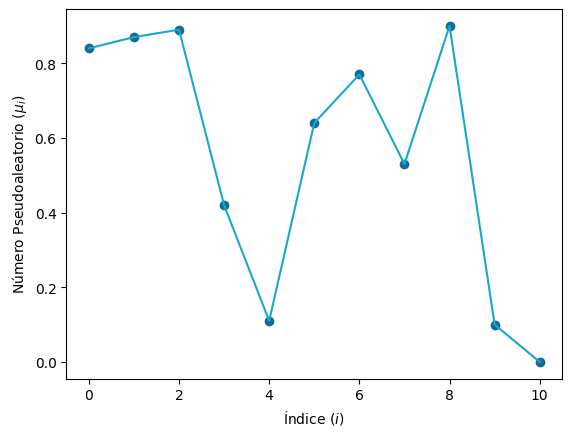

In [38]:
from src.random_number import MiddleSquareGenerator

generator = MiddleSquareGenerator(k=2, seed=84)
generator.plot_random_numbers()

## Pruebas estadísticas para validar la aleatoriedad de las sucesiones

El concepto de estas pruebas es representado con la clase abstracta `RandomnessTest`. Toda prueba tiene un constructor que recibe como parámetros el conjunto de números aleatorios a probar (`random_numbers`) y el estadístico relativo al nivel de significancia con que se realice la prueba (`statistic`) que deberá calculase manualmente. A su vez, todas deben implementar el método `run_test()` que utiliza todos estos datos para concluír en la aceptación o rechazo de la hipótesis e imprimir esto en pantalla haciendo uso de látex.

Las pruebas que se proveen son:

**Tests de uniformidad**
* `ChiSquaredTest` (prueba de Chi Cuadrada, de Pearson o de Frecuencias)
* `KolmogorovSmirnovTest` (prueba de Kolmogorov-Smirnov)

**Tests de independencia estadística**
* `WaldWolfowitzRunsTest` (prueba de rachas)

### Prueba de la Chi Cuadrada

La clase `ChiSquaredTest` recibe una lista de números aleatorios denominada `random_numbers`, el número entero `intervals` que representa la cantidad de intervalos, y `statistic` que es el estadístico correspondiente al nivel de significancia de la prueba.

Sea $\mu = \{\mu_1, \mu_2, \dots, \mu_n\}$ una secuencia de $n$ números aleatorios y $k$ la cantidad de intervalos, donde $n = k \cdot m$, se genera $k$ intervalos $[0, \frac{1}{k}), [\frac{1}{k}, \frac{2}{k}), \dots, [\frac{k-2}{k}, \frac{k-1}{k}), [\frac{k-1}{k}, 1]$ y se cuenta la cantidad de números aleatorios que caen en cada intervalo, obteniendo asi la frecuencia observada. El conjunto de números aleatorios $\mu$ pasa la prueba si

$$
X^2_0 = \sum_{i=1}^k \frac{({FO}_i - {FE}_i)^2}{{FE}_i} < X^2_{(\alpha, k-1)}
$$

donde ${FE}$ es la frecuencia esperada ($\frac{n}{k}$), ${FO}$ es la frecuencia observada y $X^2_{(\alpha, k-1)}$ es el estadístico correspondiente al nivel de semejanza escogido.

### Prueba de Kolmogorov-Smirnov

La clase `KolmogorovSmirnovTest` recibe como parámetros una lista de números aleatorios, `random_numbers`, y el estadístico correspondiente al nivel de semejanza escogido, `statistic`. Además cuenta con un método adicional llamado `graph()`, el cual grafica la secuencia de números aleatorios y la frecuencia absoluta esperada. 

Dado el conjunto de números aleatorios ordenados $\mu = \{\mu_1, \mu_2, \dots, \mu_n\}$ donde $\mu_1 < \mu_2 < \dots < \mu_n$, se compara cada número aleatorio $\mu_i$ con la función de probabilidad acumulada esperada $\frac{i}{n}$ su semejanza. El conjunto de números aleatorios $\mu$ pasa la prueba si

$$
{max}\{|\frac{i}{n} - \mu_i|\} < D(\alpha, n)
$$

donde  $D(\alpha, n)$ es el estadístico correspondiente al nivel de semejanza escogido.

### Prueba de rachas

La prueba de rachas o prueba de WaldWolfowitz es representada por la clase `WaldWolfowitzRunsTest`. Esta recibe como parámetros la lista de números aleatorios a probar `random_numbers` y el valor `statistic` que es el estadístico con el cual se comparará para determinar la aceptación o el rechazo de la hipótesis.

Para determinar las rachas, se agrupa los números aleatorios en dos categorías: *positivos* y *negativos*. Los números *positivos* son aquellos que son mayores que la media y los *negativos* son aquellos que son menores o iguales que esta. Luego se examina la secuencia de números aleatorios y se cuenta el número de cambios de categoría entre valores consecutivos. Cada cambio de categoría representa una racha.

Sea $\mu = \{\mu_1, \mu_2, \dots, \mu_m\}$ el conjunto de $m$ números aleatorios a probar, $n_1$ el número de positivos y $n_2$ el número de negativos; la clase `WaldWolfowitzRunsTest` entonces calcula

$$
\mu_b = \frac{2n_1n_2}{m} + \frac{1}{2}
$$

$$
\sigma^2_b = \frac{2n_1n_2 (2n_1n_2 - m)}{m^2 (m-1)}
$$

El conjunto de números aleatorios $\mu$ pasa la prueba de rachas si

$$
Z_b = \frac{b - \mu_b}{\sigma_b} < N_\alpha
$$

donde $N_\alpha$ es el estadístico correspondiente al nivel de semejanza escogido.

### Caso práctico

Se realizará las distintas pruebas de aletoriedad para la secuencia de números aleatorios $\mu = \{0.84, 0.87, 0.89, 0.42, 0.11, 0.64, 0.77, 0.53, 0.9, 0.1, 0.0\}$

In [39]:
from src import randomness_test

random_numbers = [0.84, 0.87, 0.89, 0.42, 0.11, 0.64, 0.77, 0.53, 0.9, 0.1, 0.0]

#### Prueba de la Chi Cuadrada

Realizaremos la prueba de la Chi Cuadrada con cuatro intervalos y un estadístico igual a $7.779$

In [40]:
randomness_test.ChiSquaredTest(random_numbers, intervals=4, statistic=7.779).run_test()

$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 3.1818181818181817$

$\chi^2_{(\alpha, k=3)} = 7.779$

$\chi^2_0 <  \chi^2_{(\alpha, k=3)} \Rightarrow$ La hipótesis se acepta.

#### Prueba de Kolmogorov-Smirnov

Realizaremos la prueba Kolmogorov-Smirnov con un estadístico igual a $0.35242$

In [41]:
randomness_test.KolmogorovSmirnovTest(random_numbers, statistic=0.35242).run_test()

$max|\frac{i}{n} - \mu_i| = 0.16272727272727272$ < $D(\alpha, n=11) = 0.35242$ $\Rightarrow$ La hipótesis se acepta.

#### Prueba de Rachas

Realizaremos la prueba Rachas con un estadístico igual a $1.645$

In [42]:
randomness_test.WaldWolfowitzRunsTest(random_numbers, statistic=1.645).run_test()

Rachas: [0.84 0.87 0.89] [0.42 0.11] [0.64 0.77] [0.53] [0.9] [0.1 0. ]


$b = 6$ (cantidad de rachas)

$n_1 = 6$ (cantidad de números positivos)

$n_2 = 5$ (cantidad de números negativos)

$Z_{\alpha/2}$ = 1.645

$Z_0 = \frac{b - \mu_b}{\sigma_b} = 0.029160592175990475$

-$Z_{\alpha/2}$ $\leq Z_0 \leq$ $Z_{\alpha/2}$ $\Rightarrow$ La hipótesis se acepta.

# Implementación de una simulación

En esta sección, realizaremos una simulación del *Algoritmo de Optimización de Colonia de Hormigas (ACO)* para abordar el *Problema del Viajante (TSP)*. Nuestro objetivo principal analizar el impacto de diferentes generadores de números aleatorios en los resultados obtenidos.

## Algoritmo de optimización de colonia de hormigas

La Optimización de Colonia de Hormigas (ACO, por sus siglas en inglés) es un algoritmo metaheurístico inspirado en el comportamiento de búsqueda de alimento de las hormigas. Se utiliza comúnmente para resolver problemas de optimización, especialmente aquellos relacionados con la optimización combinatoria.

El algoritmo ACO se basa en el concepto de senderos de feromonas, que las hormigas utilizan para comunicarse entre sí. Las hormigas depositan feromonas en los caminos que recorren, y la cantidad de feromona en un camino influye en la probabilidad de que otras hormigas elijan ese camino. Con el tiempo, los caminos con mayores cantidades de feromona se vuelven más atractivos para las hormigas, lo que resulta en la aparición de una solución al problema de optimización.

El problema de ACO implica encontrar la solución óptima para un problema dado mediante la simulación del comportamiento de las hormigas. Típicamente consta de los siguientes pasos:

1. **Inicialización:** Crear un conjunto de hormigas e inicializar los senderos de feromonas en todos los caminos.
2. **Movimiento de las hormigas:** Cada hormiga selecciona probabilísticamente un camino basado en los niveles de feromona y la información heurística.
3. **Actualización de feromonas:** Después de que todas las hormigas completen sus movimientos, se actualizan los niveles de feromona en los caminos según la calidad de las soluciones encontradas.
4. **Iteración:** Repetir los pasos 2 y 3 durante un cierto número de iteraciones o hasta que se cumpla un criterio de terminación.
5. **Extracción de la solución:** Se extrae la mejor solución encontrada por las hormigas.

## Problema

En nuestra simulación, nos centraremos en resolver el problema del Viajante en Djibouti, que consiste en encontrar el camino más corto que conecte $38$ ciudades en Djibouti y regrese al punto de partida. Utilizaremos los datos proporcionados por la [Universidad de Waterloo](https://www.math.uwaterloo.ca/tsp/world/countries.html#DJ), donde se expone las coordenadas de las ciudades (ubicadas en el archivo *data/dj38.tsp*) y el [camino óptimo](https://www.math.uwaterloo.ca/tsp/world/djtour.html) (con una longitud de $6656$ km). A lo largo de esta sección se utilizarán las librerias *Pandas*, *Matplotlib* y *Numpy*.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Visualización del problema

A continuación se mostrara un gráfico donde el *eje-x* representa la longitud y el *eje-y* representa la latitud. Cada punto del gráfico representa una ciudad por la cual se debera viajar.

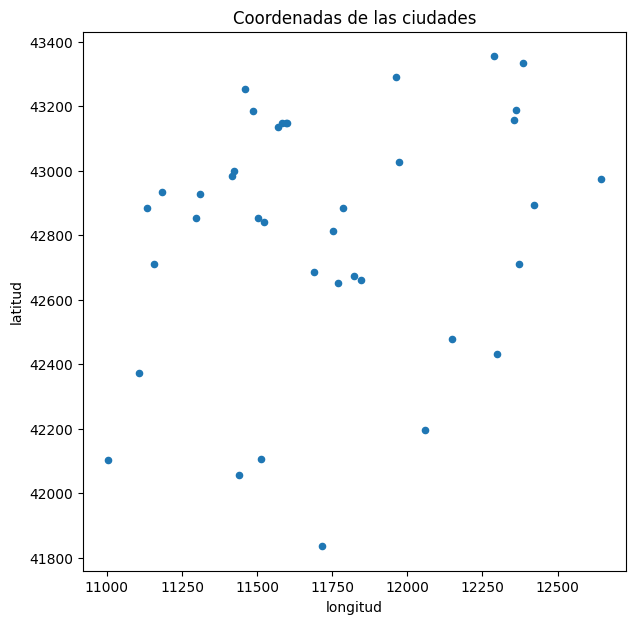

In [44]:
df = pd.read_table("data/dj38.tsp", sep=" ")
df.plot.scatter(x="longitud", y="latitud", title="Coordenadas de las ciudades", figsize=(7, 7))
plt.show()

Definamos ahora la función `show_path()` que añada en el gráfico de las ciudades el recorrido especificado. Dicha función recibirá dos parámetros: `df`, que es el *DataFrame* que contiene las ciudades con sus coordenadas, y `path`, el cual es una lista de enteros indicando el índice de las ciudades a recorrer. 

In [45]:
def show_path(df: pd.DataFrame, path: list[int]):
    df = df.copy()
    df["order"] = np.arange(len(df))
    df = df.iloc[path]
    # Plot cities
    df.plot.scatter(x="longitud", y="latitud", title="Recorrido", figsize=(7, 7))
    # Plot path
    plt.plot(df["longitud"], df["latitud"], color="grey")
    # Join last and first point
    plt.plot([df.iloc[-1]["longitud"], df.iloc[0]["longitud"]], [df.iloc[-1]["latitud"], df.iloc[0]["latitud"]], color="grey")
    plt.show()

Probemos graficar el recorrido que pasa por cada ciudad en orden, es decir, el recorrido que comienza por la *ciudad 0*, luego va a la *ciudad 1*, luego a la *ciudad 2*, y asi sucesivamente hasta llegar a la *ciudad 37* y volver a la *ciudad 0*.

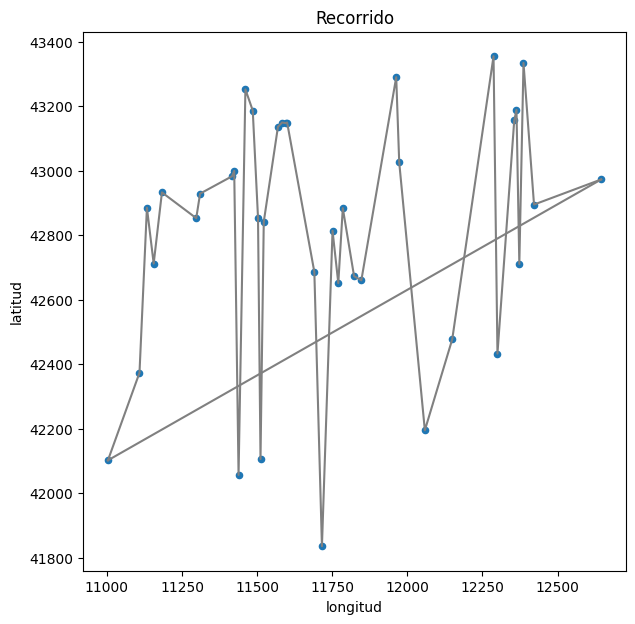

In [46]:
show_path(df, [i for i in range(len(df))])

### Implementación de la colonia de hormigas

Se implementó la clase `AntSystem`, la cual permite simular la colonia de hormigas mediante el método `run()`, el cual recibe como parámetros `max_cycles` que es la cantidad de ciclos (o recorridos) y `verbose` que, en caso de ser verdadero, muestra en cada ciclo cual es la mejor solución encontrada. Además, la simulación puede ser completamente configurada mediante los atributos de la clase:

- `cities_distance`: Una matriz cuadrada $M_{2\times2}$ que contiene la distancia entre cada ciudad. La distancia entra la ciudad $i$ y la ciudad $j$ está representada por el elemento $M_{ij}$
- `alpha`: Factor de importancia de feromonas.
- `beta`: Factor de importancia heurística.
- `evaporation_rate`: Tasa de evaporación de las feromonas.
- `n_ants`: Número de hormigas.
- `round_trip`: Indica si las hormigas deben regresar a la ciudad de inicio.
- `random_variable`: Variable aleatoria discreta utilizada para la selección de ciudades.

Como se mencionó anteriormente, nos centraremos en comparar como cambia la solución encontrada por el algoritmo al configurar distintas variables aleatorias discretas.

Comenzaremos por obtener la matriz de distancia $M$ a partir de los datos del problema. Para ello definimos la función `distance()` que calcula la distancia entre dos ciudades y la función `distance_matrix()` que calcula la matriz de distancias para un arreglo de ciudades determinado. 

In [47]:
def distance(city1: tuple[int, int], city2: tuple[int, int]):
    """Calcula la distancia entre dos ciudades"""
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

def distance_matrix(cities: np.ndarray):
    """Calcula la matriz de distancias"""
    n_cities = len(cities)
    cities_distance = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        for j in range(n_cities):
            cities_distance[i, j] = distance(cities[i], cities[j])
    return cities_distance

M = distance_matrix(df.values)
M

array([[   0.        ,  290.99301545,  794.00183127, ..., 1852.35373049,
        1624.75194088, 1858.09261272],
       [ 290.99301545,    0.        ,  512.54097969, ..., 1598.94551098,
        1412.88752368, 1649.18902517],
       [ 794.00183127,  512.54097969,    0.        , ..., 1331.29480435,
        1288.37008374, 1514.19696932],
       ...,
       [1852.35373049, 1598.94551098, 1331.29480435, ...,    0.        ,
         440.55907953,  444.22745405],
       [1624.75194088, 1412.88752368, 1288.37008374, ...,  440.55907953,
           0.        ,  236.48918264],
       [1858.09261272, 1649.18902517, 1514.19696932, ...,  444.22745405,
         236.48918264,    0.        ]])

Por ejemplo, la distancia entre la *ciudad 3* y la *ciudad 4* es $M_{3,4} \approx 222.539$ km, tal como se muestra a continuación.

In [48]:
M[3, 4]

222.53897723520097

Ahora, iniciaremos un sistema de hormigas con un factor de importancia de fermomonas $\alpha=1$, un factor de importance heurística de $\beta=5$ y una tasa de evaporación $p = 0.5$, tal como se sugiere en **[ACO]**. Además el sistema estará compuesto de $10$ hormigas y configuraremos un recorrido cerrado. 

In [49]:
from src.ant_system import AntSystem

aco = AntSystem(
    cities_distance=M,
    alpha=1,
    beta=5,
    n_ants=10,
    round_trip=True,
    evaporation_rate=0.5,
    random_variable=None,
)

### Análisis de distintos generadores de números aleatorios

A continuación analizaremos como el rendimiento de distintos generadores de números aleatorios afecta al resultado obtenido por la simulación. Para ello definiremos cuatro generadores, los cuales serán sometidos a las distintas pruebas de aletoriedad, y luego se mostrarán los resultados obtenidos al ejecutar $100$ ciclos de la simulación utilizando una variable aleatoria discreta compuesta por cada uno de los generadores.

In [50]:
from src import random_number
from src import randomness_test
from src.random_variable import DiscreteRandomVariable

#### Generador 1

El primero es un generador congruencial mixto, con una longitud de ciclo de $43901$.

$$
x_{n} = \left( 127x_{n-1} + 52711 \right)\bmod 87803
$$
$$
x_0 = 111
$$

In [84]:
generator1 = random_number.MixedCongruentialGenerator(a=127, b=52711, m=87803, seed=111)
print(len(generator1))

43901


#### Pruebas de aletoriedad

A continuación se realiza la prueba de Chi Cuadrada con $11$ intervalos y un nivel de significancia de $\alpha = 0.01$. El valor del estadístico es $\chi^2_{(v=10, \alpha=0.01)} = 23.2093$

In [52]:
randomness_test.ChiSquaredTest(generator1.get_random_numbers(), intervals=11, statistic=23.2093).run_test()

$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 3.9533951390628914$

$\chi^2_{(\alpha, k=10)} = 23.2093$

$\chi^2_0 <  \chi^2_{(\alpha, k=10)} \Rightarrow$ La hipótesis se acepta.

Ahora, realizamos la prueba de Kolmogorov-Smirnov con un nivel de significancia de $\alpha = 0.01$. El valor del estadístico es $D(\alpha, n) = \frac{1.63}{43901}$

In [98]:
randomness_test.KolmogorovSmirnovTest(generator1.get_random_numbers(), statistic=1.63/len(generator1)).run_test()

$max|\frac{i}{n} - \mu_i| = 0.0005467484049701023$ > $D(\alpha, n=43901) = 3.7128994783717905e-05$ $\Rightarrow$ La hipótesis se rechaza.

Debido a la extensa longitud de la secuencia de números aleatorios generadas, se realiza la prueba de Rachas para los primeros $100$ números aleatorios generados, con un nivel de significancia de $\alpha = 0.0099$. El valor del estadístico es $Z = 2.33$

In [54]:
randomness_test.WaldWolfowitzRunsTest(generator1.get_random_numbers()[:100], statistic=2.33).run_test()

Rachas: [0.00126419] [0.76088516] [0.23274831 0.15936813] [0.84008519] [0.29115178] [0.576609   0.82967552 0.96912406 0.67908841 0.84456112 0.85959477
 0.76886895] [0.24668861] [0.929786   0.68315433] [0.360933   0.43882327 0.33088847] [0.62316777 0.74263977 0.91558375 0.87946881] [0.29287154] [0.79501839 0.56766853 0.69423596 0.76829949] [0.17436762] [0.7450201] [0.21788549 0.27179026 0.1176953 ] [0.54763505] [0.14998349] [0.64823525 0.92620981] [0.22897851] [0.68060317] [0.03693496 0.29107206] [0.56648406 0.5438083  0.66398642 0.92660843] [0.2796032 0.1099393] [0.56262314] [0.05347198 0.39127365 0.29208569] [0.69521543 0.89269159 0.97216496] [0.06528251] [0.89121101 0.78413038] [0.18489118 0.08151202] [0.95235926 0.54995843] [0.44505313 0.12208011 0.10450668] [0.87268089] [0.43080533 0.31260891 0.30166395] [0.9116545] [0.38045397] [0.91798686] [0.18466339 0.05258362 0.2784529 ] [0.96385089] [0.00939603] [0.79362892] [0.39120531 0.28340717] [0.59304352 0.91685933] [0.04146783] [0.8667

$b = 54$ (cantidad de rachas)

$n_1 = 56$ (cantidad de números positivos)

$n_2 = 44$ (cantidad de números negativos)

$Z_{\alpha/2}$ = 2.33

$Z_0 = \frac{b - \mu_b}{\sigma_b} = 0.8608174614728519$

-$Z_{\alpha/2}$ $\leq Z_0 \leq$ $Z_{\alpha/2}$ $\Rightarrow$ La hipótesis se acepta.

#### Resultado de la simulación

Una vez realizadas las pruebas de aletoriedad, pasamos a crear la variable aleatoria discreta y ejecutar la simulación.

In [61]:
aco.random_variable = DiscreteRandomVariable(generator1, values=None, weights=None)
aco.run(max_cycles=100)

print(f"Mejor recorrido encontrado: {aco.best_solution}", end="\n\n")
print(f"Longitud del mejor recorrido: {aco.best_solution_cost}")

Mejor recorrido encontrado: [11 10  8  7  6  5  4  2  3  1  0  9 13 20 28 29 31 34 36 37 32 33 35 30
 26 27 23 21 25 24 22 19 14 12 18 17 16 15]

Longitud del mejor recorrido: 6667.029907787184


Podemos visualizar el mejor recorrido encontrado en el siguiente gráfico.

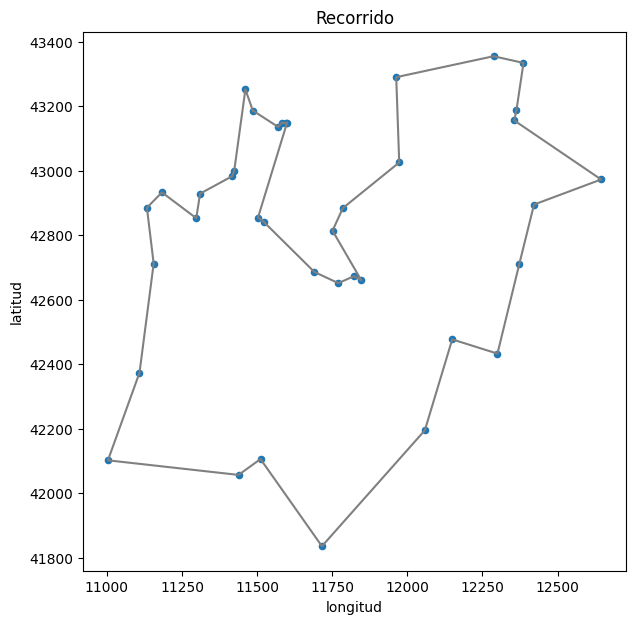

In [62]:
show_path(df, aco.best_solution)

Como se puede observar, el *Generador 1* paso la prueba de la Chi Cuadrada y de Rachas, sin embargo no paso la prueba de Kolmogorov-Smirnov. El mejor recorrido encontrado utilizando este generador tiene una longitud de aproximadamente $6667.03$ kilómetros, tan solo  $11.03$ kilómetros por arriba del óptimo.

#### Generador 2

El segundo es un generador congruencial mixto de ciclo completo, con una longitud de ciclo de $128$.

$$
x_{n} = \left( 5 x_{n-1} + 7 \right)\bmod 128
$$
$$
x_0 = 4
$$

In [85]:
generator2 = random_number.MixedCongruentialGenerator(a=5, b=7, m=128, seed=4)
print(len(generator2))

128


#### Pruebas de aletoriedad

A continuación se realiza la prueba de Chi Cuadrada con $8$ intervalos y un nivel de significancia de $\alpha = 0.01$. El valor del estadístico es $\chi^2_{(v=7, \alpha=0.01)} = 18.4753$

In [95]:
randomness_test.ChiSquaredTest(generator2.get_random_numbers(), intervals=8, statistic=18.4753).run_test()

$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 0.0$

$\chi^2_{(\alpha, k=7)} = 18.4753$

$\chi^2_0 <  \chi^2_{(\alpha, k=7)} \Rightarrow$ La hipótesis se acepta.

Ahora, realizamos la prueba de Kolmogorov-Smirnov con un nivel de significancia de $\alpha = 0.01$. El valor del estadístico es $D(\alpha, n) = \frac{1.63}{128}$

In [96]:
randomness_test.KolmogorovSmirnovTest(generator2.get_random_numbers(), statistic=1.63/len(generator2)).run_test()

$max|\frac{i}{n} - \mu_i| = 0.0078125$ < $D(\alpha, n=128) = 0.012734375$ $\Rightarrow$ La hipótesis se acepta.

Por último, se realiza la prueba de Rachas con un nivel de significancia de $\alpha = 0.0099$. El valor del estadístico es $Z = 2.33$.

In [97]:
randomness_test.WaldWolfowitzRunsTest(generator2.get_random_numbers(), statistic=2.33).run_test()

Rachas: [0.03125   0.2109375 0.109375 ] [0.6015625] [0.0625    0.3671875] [0.890625  0.5078125 0.59375  ] [0.0234375 0.171875 ] [0.9140625 0.625    ] [0.1796875] [0.953125  0.8203125] [0.15625] [0.8359375] [0.234375  0.2265625 0.1875   ] [0.9921875] [0.015625  0.1328125] [0.71875   0.6484375] [0.296875] [0.5390625 0.75      0.8046875] [0.078125  0.4453125 0.28125   0.4609375 0.359375 ] [0.8515625] [0.3125] [0.6171875] [0.140625] [0.7578125 0.84375  ] [0.2734375 0.421875  0.1640625] [0.875] [0.4296875 0.203125  0.0703125 0.40625   0.0859375 0.484375  0.4765625
 0.4375    0.2421875 0.265625  0.3828125] [0.96875   0.8984375 0.546875  0.7890625] [0.        0.0546875 0.328125 ] [0.6953125 0.53125   0.7109375 0.609375 ] [0.1015625] [0.5625    0.8671875] [0.390625  0.0078125 0.09375  ] [0.5234375 0.671875 ] [0.4140625 0.125    ] [0.6796875] [0.453125  0.3203125] [0.65625] [0.3359375] [0.734375  0.7265625 0.6875   ] [0.4921875] [0.515625  0.6328125] [0.21875   0.1484375] [0.796875] [0.0390625 

$b = 55$ (cantidad de rachas)

$n_1 = 64$ (cantidad de números positivos)

$n_2 = 64$ (cantidad de números negativos)

$Z_{\alpha/2}$ = 2.33

$Z_0 = \frac{b - \mu_b}{\sigma_b} = -1.6860296357240232$

-$Z_{\alpha/2}$ $\leq Z_0 \leq$ $Z_{\alpha/2}$ $\Rightarrow$ La hipótesis se acepta.

#### Resultado de la simulación

Finalizadas las pruebas de aletoriedad, creamos la variable aleatoria discreta y ejecutamos la simulación.

In [102]:
generator3 = random_number.DependentGenerator(seed=3)
aco.random_variable = DiscreteRandomVariable(generator3, values=None, weights=None)
aco.run(max_cycles=100)

print(f"Mejor recorrido encontrado: {aco.best_solution}", end="\n\n")
print(f"Longitud del mejor recorrido: {aco.best_solution_cost}")

Mejor recorrido encontrado: [11 10  8  7  6  5  4  2  3  1  0  9 13 20 28 29 31 34 36 37 32 33 35 30
 26 27 23 21 25 24 22 19 14 12 18 17 16 15]

Longitud del mejor recorrido: 6667.029907787184


Podemos visualizar el mejor recorrido encontrado en el siguiente gráfico.

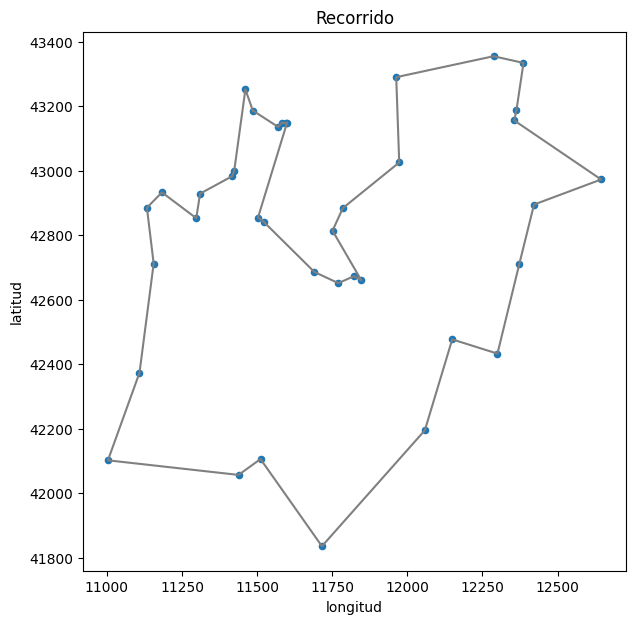

In [101]:
show_path(df, aco.best_solution)

# Bibliografía

* **[ACO] Ant System: Optimization by a colony of cooperating agents. IEEE Trans Syst
Man Cybernetics - Part B**. Marco Doringo, Alberto Colorni, Vittorio Maniezzo.